# Curve fitting application: Boyer et al. (2011) for rheology of dense suspension

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of Computational and Data Sciences

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

In this notebook, we will demonstrate how to use nonlinear curve fitting to reproduce the 

> F. Boyer, E. Guazzelli, and O. Pouliquen (2011). Unifying suspension and granular rheology. Physical Review Letters. 107, 188301.

Boyer et al. (2011) proposed the following entrainment law, which was derived from curve fitting:
\begin{equation}
  \mu(I_v) = \mu_1 + \frac{\mu_2-\mu_1}{1+I_0/I_v} + I_v + \frac{5}{2} \phi_m I_v^{1/2}
\end{equation}
where $I_v$ is a dimensionless viscous number, $\mu$ is viscosity, $\mu_1$, $\mu_2$ and $I_0$ are constants provided, and $\phi_m$ is a constant for the volume fraction of suspended particles.  

This equation is nonlinear and we can use nonlinear curve fitting methods. We will use the "curve_fit" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library, which uses non-linear least squares to fit a function for a give set of data.

The data points were digitized from Figure 2(b) in Boyer et al. (2011) and provided in the text data file "figure_data.csv".

Note: the following code gives fitting results slightly different from those reported in Boyer et al. (2011). The difference is due to the inaccuracy in the digitized data from the figure in the paper. 

r_squared =  0.9934334234057703


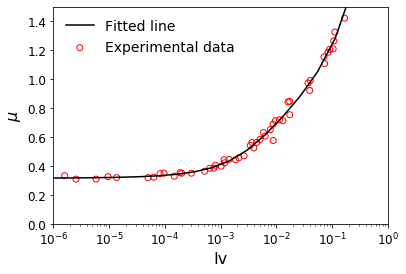

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def rheology_fit(Iv, mu1, mu2, I0):
    return mu1+(mu2-mu1)/(1.0+I0/Iv)+Iv+5.0/2.0*0.585*Iv**0.5

# load the measurement data in Numpy array format
Iv, mu = np.loadtxt('figure_data.csv', delimiter=',', unpack=True, skiprows=1)

fitting_parameters, covariance = curve_fit(rheology_fit, Iv, mu)
mu1,mu2,I0 = fitting_parameters

#get the residual
residuals = mu- rheology_fit(Iv, mu1,mu2,I0)
#get the sum of residual squared
ss_res = np.sum(residuals**2)
#get the total sum of squares (ss_tot) with
ss_tot = np.sum((mu-np.mean(mu))**2)
#finally, the r_squared-value
r_squared = 1 - (ss_res / ss_tot)

print("r_squared = ", r_squared)

# predicted value using the fitting curve
x_pred = np.linspace(-6, 0, num=20)
Iv_pred = 10**x_pred
mu_pred = mu1+(mu2-mu1)/(1.0+I0/Iv_pred)+Iv_pred+5.0/2.0*0.585*Iv_pred**0.5

# plotting the original data points
plt.scatter(Iv, mu, c = "none", edgecolors = "r", marker = "o", label='Experimental data') 

# plotting the regression line 
plt.plot(Iv_pred, mu_pred, color = "k", label='Fitted line') 

plt.xlabel('Iv',fontsize=16) 
plt.ylabel('$\mu$',fontsize=16) 

plt.xscale('log')

plt.xlim([1e-6, 1])
plt.ylim([0, 1.5])

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show() 